In [737]:
import pandas as pd
import mynumpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline
from sklearn import linear_model

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


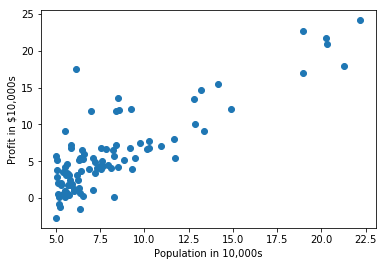

In [738]:
df = pd.read_csv('ex1data1.txt',header = None,names=['Population', 'Profit'])

print(df.head())

fig, ax = plt.subplots()
ax.scatter(df['Population'],df['Profit'])
ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
df.describe()

#### Gradient Descent
    We will fit the the linear regression parameters to our data set using gradient descent.
    
#### Cost Function
    The objective of linear regression is to minimize the cost function. 
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\big[(h_\theta\,(x^{(i)})-y^{(i)}\,)^2\big] $$

   where the hypothesis is given by this liner model
$$ h_\theta\,(x)= \theta^Tx $$

    

In [739]:
#we add another dimension to our data to accommodate the θ intercept term which is also knwon as bias. 
#We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.
df.insert(0,'Ones',1)
df.head()


,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [740]:

def ComputeCost(X,y,theta):
    #np.power raises the individual exponent to desired power - 2
    hypothesis = np.power(((X*theta.T) -y),2,dtype=float128)
    
    #np.sum sums up all the elements of an array which is what we want 
    #according to the given formula
    J  = np.sum(hypothesis) /(2*X.shape[0])
    
    return J
    

In order to calculate Cost function according to the above formula, we need to make sure that the type of X y and theta are compatible with each other. We will change matrix type for that reason.

In [741]:

theta = np.matrix(np.array([0,0]))
#we need to put 1s in first column of X for theta_0 which is always multiplie
#with X1 which is 1

X = np.matrix(df[['Ones','Population']].values)
Y = np.matrix(df[['Profit']].values)

print(X.shape,Y.shape,theta.shape)


((97, 2), (97, 1), (1, 2))


In [742]:
print(ComputeCost(X,Y,theta))


32.0727338775


When we tested with (-1,2) theta values, the cost values have gone up. Our objective is to minimize by adjusting theta values. So we will create Gradient Descent to do the job. We will set alpha, learning rate which will tune the theta values with iterations. That is , we minimize the value of cost function by changing the values of vector theta, not X and Y. One way to keep track of the descending cost function value is printing at every iteration. 
![title](equation.png)

In [743]:


def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    
    J = np.zeros(num_iters,dtype=float128)
    X_reshape = np.delete(X,[0],axis=1)
    
    for iter in np.arange(num_iters):
        
        error = (X*theta.T) - y
        square_error = np.multiply(error,X_reshape)
        
        
        theta_change= alpha* (1/float(X.shape[0]))* np.sum(square_error)
        theta = theta - theta_change
        
        J[iter] = ComputeCost(X, y, theta)
        
        
    return(theta,J)

theta = np.matrix(np.array([0,0]))

theta,J =gradientDescent(X,Y,theta)
ComputeCost(X,Y,theta)


6.4244805296159109773

In [749]:
df_multiple = pd.read_csv('ex1data2.txt',header = None,names=['Size', '#bedrooms','Price'])
df_multiple = (df_multiple - df_multiple.mean()) / df_multiple.std()  
df_multiple.insert(0,'Ones',1)
df.head()
theta_mul = np.matrix(np.array([0,0,0]))
#we need to put 1s in first column of X for theta_0 which is always multiplie
#with X1 which is 1

X_mul = np.matrix(df_multiple[['Ones','Size','#bedrooms']].values)
Y_mul = np.matrix(df_multiple[['Price']].values)


print(ComputeCost(X_mul,Y_mul,theta_mul))
theta_mul,J_mul =gradientDescent(X_mul,Y_mul,theta_mul)

ComputeCost(X_mul,Y_mul,theta_mul)

0.489361702128


0.3118481760540427529

In [746]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)
square_error= np.power(regr.predict(X)-Y,2)
mean_squaer_error = np.mean(np.power(regr.predict(X)-Y,2))
print(mean_squaer_error)

8.95394275195


In [747]:
regr = linear_model.LinearRegression()
regr.fit(X_mul,Y_mul)
square_error= np.power(regr.predict(X_mul)-Y_mul,2)
mean_squaer_error = np.mean(square_error)
print(mean_squaer_error)

0.261372961078
